In [1]:
# imports and defining initial conditions/evolution operators
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# include jump operators for 2Q analyze results, make sure it makes sense
# then expand to 3Q

In [194]:
# Time and step variables
time = 30
t_span = (0, time)  # Time interval
t_eval = np.linspace(0, time, 3000) # time 0 to 10 with 1000 steps

n = 1       # number of runs

# Coefficients and Operators
delta = 1
gamma = 0.5



s_p = np.array([[0,1], [0,0]])
s_m = np.array([[0,0], [1,0]])
s_z = np.array([[1,0], [0,-1]])
I = np.array([[1,0],[0,1]])


Hamiltonian = np.array([[0,0,0,1],  # must be hermitian: equal to its conj transpose
                        [0,1,0,0],  # since this represents the closed part of the system
                        [0,0,1,0], # you can flip 1 and 4 to have them anti-synchronized
                        [1,0,0,1]]) # make elements (1,4) and (4,1) = 1 and make elements (1,1) and (4,4) = 0 

print("Hamiltonian matrix H: \n", Hamiltonian, "\n")

rho0 = np.array([[0.25,0,0,0],[0,0.25,0,0],[0,0,0.25,0],[0,0,0,0.25]], dtype = 'complex')

print("ρ(0) = \n", rho0)

L = np.array([[1,0,0,0],  # can be somewhat arbitrary
              [0,1,1,0],
              [0,0,1,1],
              [0,0,0,1]])

print("L = \n", L)

Hamiltonian matrix H: 
 [[0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 1]] 

ρ(0) = 
 [[0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j]]
L = 
 [[1 0 0 0]
 [0 1 1 0]
 [0 0 1 1]
 [0 0 0 1]]


In [195]:
def Lindblad(t, rho_flat, H, L, gamma):
    
    rho = rho_flat.reshape((4, 4))
    
    V = L
    V_dag = V.conj().T
    
    drho_dt = -1j * (H @ rho - rho @ H) + gamma * (V @ rho @ V_dag - 0.5*(V_dag @ V @ rho) - 0.5*(rho @ V_dag @ V))
    
    return drho_dt.flatten()
    
def solve_density_matrix():
    H = Hamiltonian  # Constant Hamiltonian for simplicity
    
    # Flatten the initial density matrix for the solver
    rho0_flat = rho0.flatten()
    
    # Solve the equation
    sol = solve_ivp(Lindblad, t_span, rho0_flat, t_eval=t_eval, args=(H,L, gamma))
    
    # Reshape the solution back into matrix form for each time point
    rho_t = np.array([sol.y[:, i].reshape((4, 4)) for i in range(len(sol.t))])
    return sol.t, rho_t

times, rho_t = solve_density_matrix()

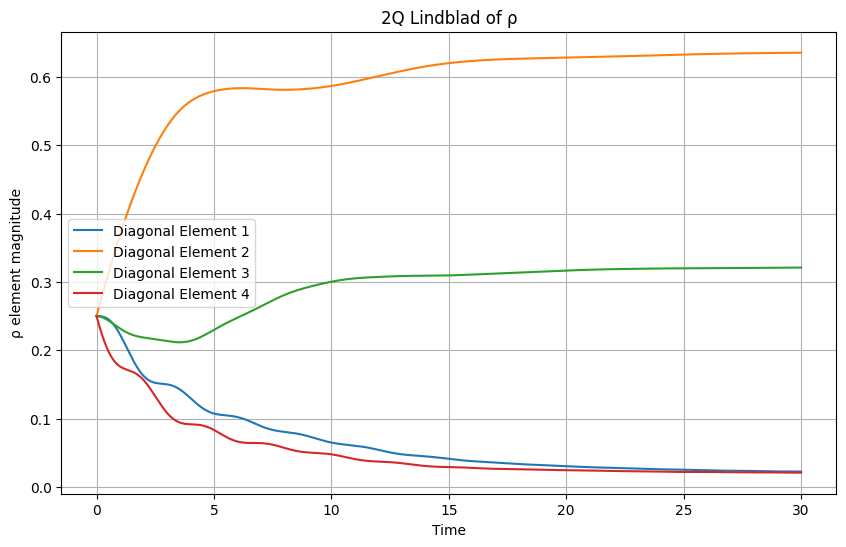

In [196]:
def plot_4x4_Density(times,rho_t):
    
        # Plot the values of each element of rho against time
    plt.figure(figsize=(10, 6))

    #j = 26 # plot thickness

    #for i in range(rho_t.shape[1]):
    #    if i % ((np.sqrt(len(rho_t[0])) + 1)) == 0:  # Check if the index is a diagonal element
    #        plt.plot(times, rho_t[:, i], label=f"Diagonal Element {i + 1}",linewidth=j)
    #        j -= 3
    
    #print(rho_t[:,0,0])
    
    
    
    plt.plot(times, rho_t[:,0,0], label=f"Diagonal Element 1")
    plt.plot(times, rho_t[:,1,1], label=f"Diagonal Element 2")
    plt.plot(times, rho_t[:,2,2], label=f"Diagonal Element 3")
    plt.plot(times, rho_t[:,3,3], label=f"Diagonal Element 4")
    
    
    plt.xlabel('Time')
    plt.ylabel('ρ element magnitude')
    plt.title('2Q Lindblad of ρ') 
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return None

plot_4x4_Density(times,rho_t) # assume all states are equally likely at the beginning

                              # parameter estimation, which parameters match the stock data the best


# this could represent an already synchronized set of two stocks. My algorithm will give an output such that
# each qubit state represents buying or selling a specific stock. This output shows that 
# I should |00> sell both 50% of the time, do not buy both 0% of the time, and an oscillation of buying on or the
# other for the other 50%. This is representative of the real world

# At the time when Diag2 = Diag3, my algorithm will suggest to sell both 50% of the time, and sell/buy
# 2 or 3 the other 50% of the time. based on this, you should probably sell both, since it is the highest liklihood.
# the advantage is that you can see what other options my algorithm will suggest if you (as a stock trader) 
# does not choose the first option.
